In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,solve_bvp

import warnings
from pylab import *
warnings.filterwarnings('ignore')

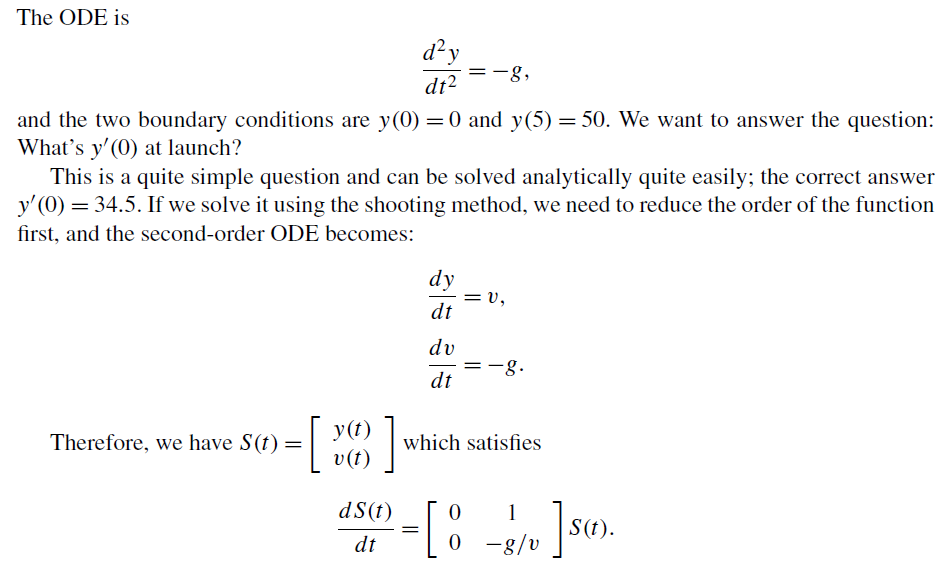

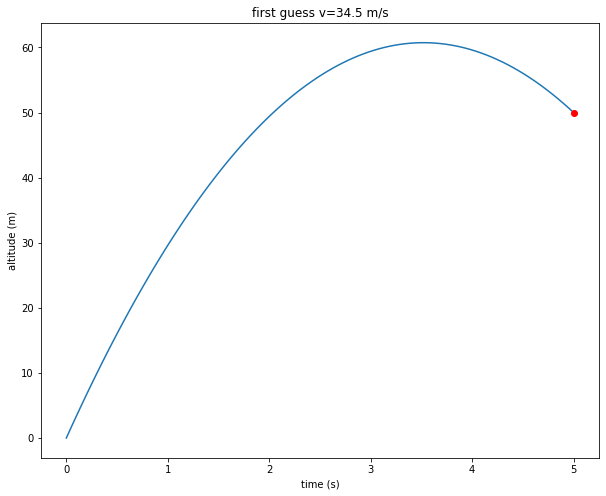

In [2]:
F = lambda t, s: np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)
t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 34.5
t_eval = np.linspace(0, 5, 100)
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.title(f"first guess v={v0} m/s")
plt.show()

In [3]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.499999999999986


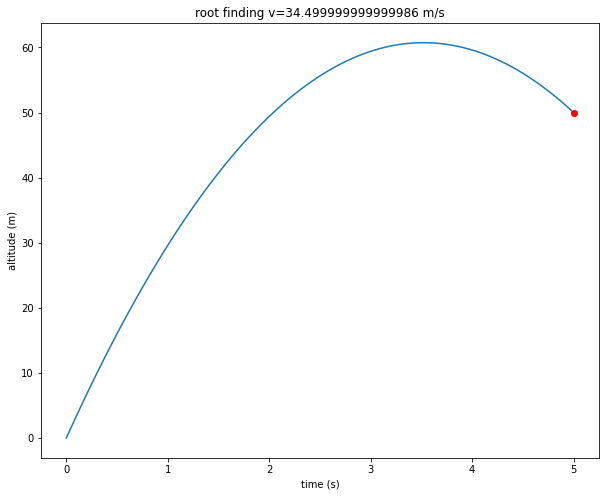

In [4]:
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.title(f"root finding v={v0} m/s")
plt.show()

In [5]:
for v0_guess in range(1, 100, 10):
    v0, = fsolve(objective, v0_guess)
    print("Init: %d, Result: %.1f" %(v0_guess, v0))

Init: 1, Result: 34.5
Init: 11, Result: 34.5
Init: 21, Result: 34.5
Init: 31, Result: 34.5
Init: 41, Result: 34.5
Init: 51, Result: 34.5
Init: 61, Result: 34.5
Init: 71, Result: 34.5
Init: 81, Result: 34.5
Init: 91, Result: 34.5


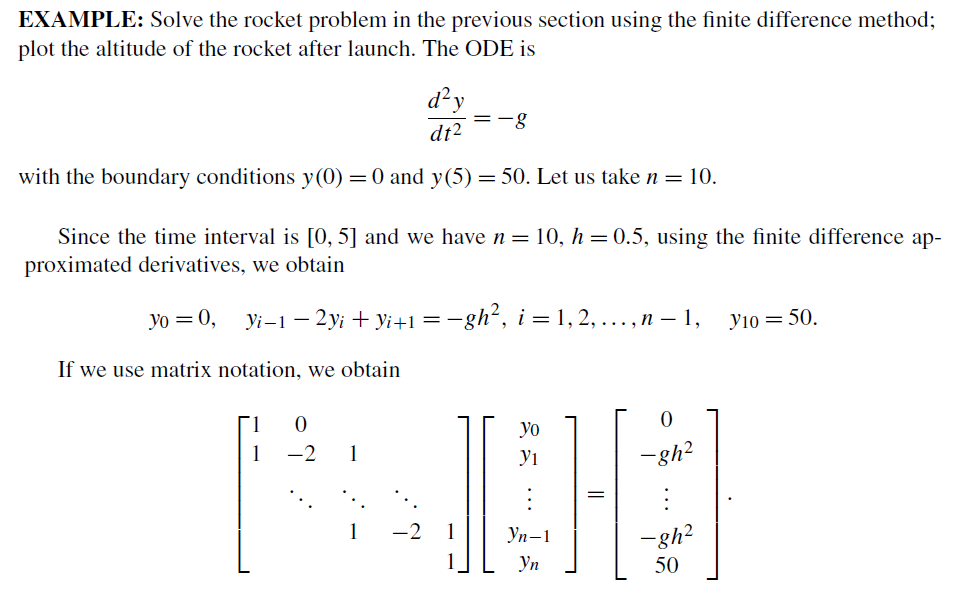

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


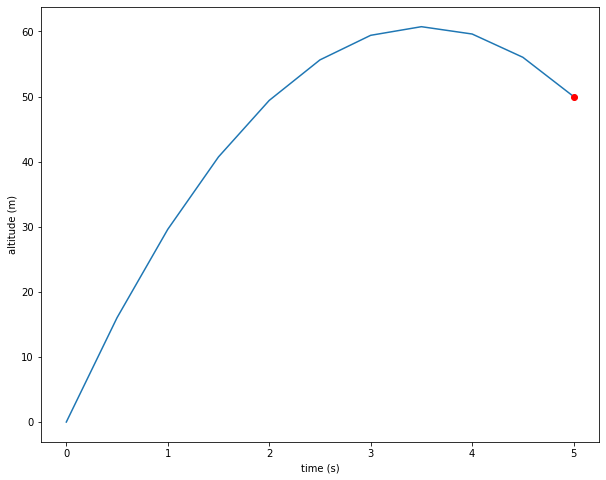

In [6]:
n = 10
h = (5-0) / n
# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1
print(A)
# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)
# solve the linear equations
y = np.linalg.solve(A, b)
t = np.linspace(0, 5, 11)
plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.show()

In [7]:
y_n1 = -9.8*h**2 + 2*y[0] - y[1]
(y[1] - y_n1) / (2*h)

34.5

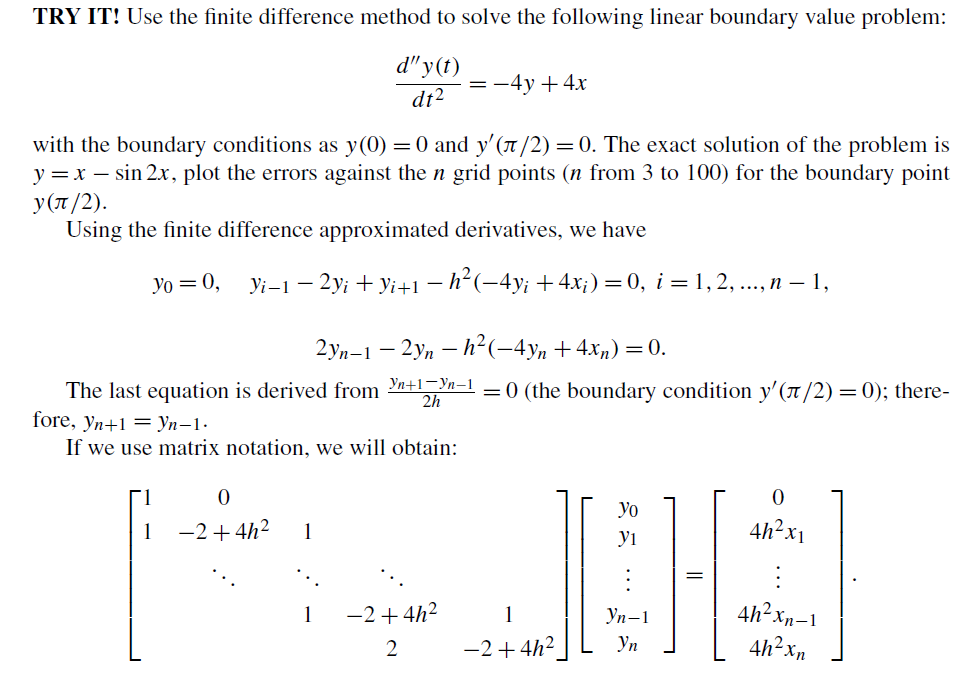

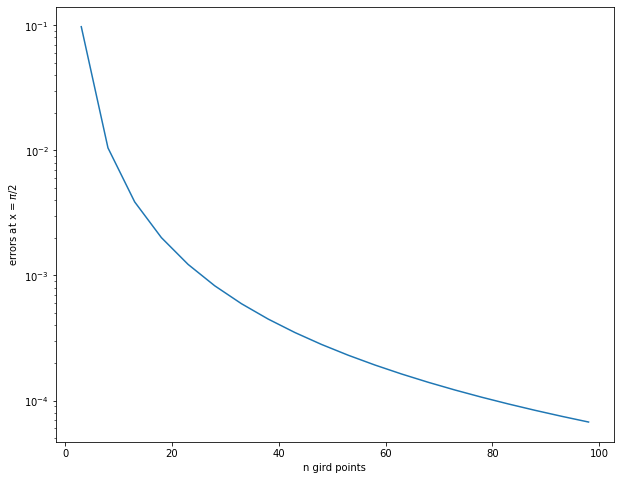

In [8]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1
    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)
n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale("log")
plt.xlabel("n gird points")
plt.ylabel("errors at x = $\pi/2$")
plt.show()

4.Solve the following boundary value problem with $y(0) = 0$ and $y(π/2) = 1:$
$ \\ \qquad\qquad\qquad\qquad \displaystyle{y'' + (1 − 0.2x)y^2 = 0.}$

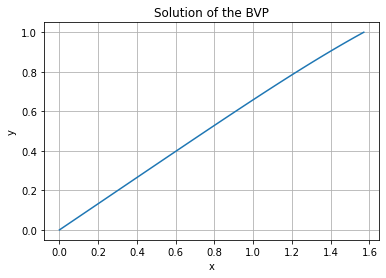

In [10]:
# Define the ODE system
def ode(x, y):
    return np.vstack((y[1], -y[0]**2 + (1 - 0.2*x)*y[0]**2))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[0] - 1])

# Define the initial guess for the solution
x_guess = np.linspace(0, np.pi/2, 100)
y_guess = np.zeros((2, x_guess.size))

# Solve the boundary value problem using solve_bvp
sol = solve_bvp(ode, bc, x_guess, y_guess)

# Generate x values for plotting
x_vals = np.linspace(0, np.pi/2, 100)

# Evaluate the solution at the desired x values
y_vals = sol.sol(x_vals)[0]

# Plot the solution
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the BVP')
plt.grid(True)
plt.show()

y(0)= 0.0
y(pi/2)= 1.0050025589655545


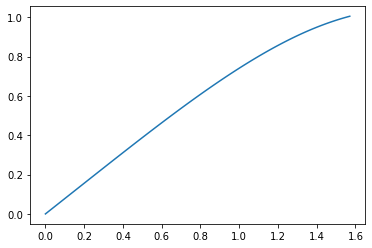

In [69]:
def f(t,S):
    y,v=S
    dy=v
    ddy=-(1-0.2*x)*y**2
    return dy,ddy
x=1
y0=0
v0=0.78
tf=np.pi/2
t=np.linspace(0,tf,101)
sol=solve_ivp(f,(0,tf),(y0,v0),t_eval=t)
y,v=sol.y
#print(sol.y[:])
plt.plot(t,y)

print('y(0)=',y[0])
print('y(pi/2)=',y[-1:][0])

5.Solve the following ODE with $y(0) = 0$ and $y(π) = 0:$
$ \\ \qquad\qquad\qquad\qquad \displaystyle{y''+ \sin y +1 = 0.}$

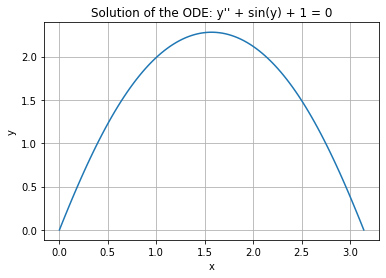

In [11]:
def odefun(x, y):
    return np.vstack((y[1], -np.sin(y[0]) - 1))

def bcfun(ya, yb):
    return np.array([ya[0], yb[0]])

# Define the interval for x
x = np.linspace(0, np.pi, 100)

# Initial guess for the solution
y_guess = np.zeros((2, x.size))

# Solve the boundary value problem
sol = solve_bvp(odefun, bcfun, x, y_guess)

# Extract the solution
y = sol.sol(x)[0]

# Plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the ODE: y\'\' + sin(y) + 1 = 0')
plt.grid(True)
plt.show()

y(0)= 0.0
y(pi)= [0.01943293]


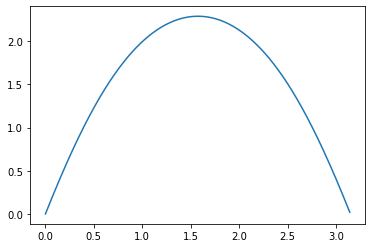

In [12]:
def f(t,S):
    y,v=S
    dy=v
    ddy=-(1+np.sin(y))
    return dy,ddy
x=1
y0=0
v0=2.81
tf=np.pi
t=np.linspace(0,tf,10001)
sol=solve_ivp(f,(0,tf),(y0,v0),t_eval=t)
y,v=sol.y
#print(sol.y[:])
plt.plot(t,y)

print('y(0)=',y[0])
print('y(pi)=',y[-1:])

6.Given the ODE with the boundary conditions $y(0) = 0$ and $y(12) = 0,$
$ \\ \qquad\qquad\qquad\qquad \displaystyle{y''+0.5x^2 −6x = 0,}$
what is the value of $y'(0)?$

In [13]:
def odefun(x, y):
    return np.vstack((y[1], -0.5 * x**2 + 6 * x))

def bcfun(ya, yb):
    return np.array([ya[0], yb[0]])

# Define the interval for x
x = np.linspace(0, 12, 100)

# Initial guess for the solution
y_guess = np.zeros((2, x.size))

# Solve the boundary value problem
sol = solve_bvp(odefun, bcfun, x, y_guess)

# Extract the solution
y = sol.sol(x)[0]

# Calculate y'(0)
dy_dx_0 = sol.sol(0)[1]

print("y'(0) =", dy_dx_0)

y'(0) = -71.99999999999999


7. Solve the following ODE with boundary conditions y(1) = 0, y''(1) = 0 and y(2) = 1:
$ \\ \qquad\qquad\qquad\qquad \displaystyle{y''' + \frac{1}{x}y'' − \frac{1}{x^2}y' −0.1(y')^3 = 0.}$

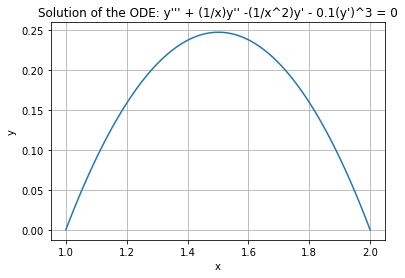

In [14]:
def odefun(x, y):
    return np.vstack((y[1], y[2], (1/x) * y[1] - (1/x**2) * y[0] - 0.1 * y[1]**3))

def bcfun(ya, yb):
    return np.array([ya[0], yb[0], ya[1] - 1])

# Define the interval for x
x = np.linspace(1, 2, 100)

# Initial guess for the solution
y_guess = np.zeros((3, x.size))

# Solve the boundary value problem
sol = solve_bvp(odefun, bcfun, x, y_guess)

# Extract the solution
y = sol.sol(x)[0]

# Plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the ODE: y\'\'\' + (1/x)y\'\' -(1/x^2)y\' - 0.1(y\')^3 = 0')
plt.grid(True)
plt.show()

8.  A flexible cable is suspended between two points, as shown in the following figure.             
The density of the cable is uniform. The shape of the cable y(x) is governed by the differential equation:

$$ \displaystyle \frac{d^2y}{dx^2}=C\sqrt{1+\bigg(\frac{dy}{dx}\bigg)^2} $$

   here C is a constant that equal to the ratio of the weight per unit length of the cable to the
magnitude of the horizontal component of tension in the cable at its lowest point.                

The cable hangs between two points specified by y(0) = 8 m and y(10) = 10 m, and C = 0.039 m$^{−1}$.                                                                                          
Can you determine and plot the shape of the cable between x = 0 and x = 10?

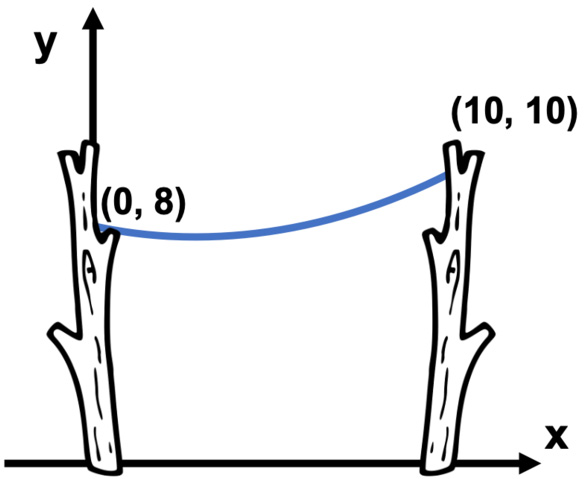

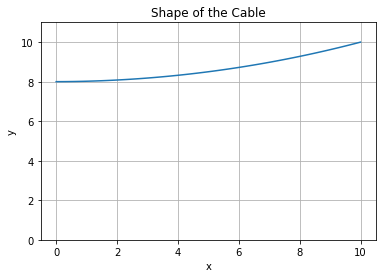

In [15]:
def odefun(x, y):
    dy_dx = y[1]
    dy2_dx2 = C*np.sqrt(1 + dy_dx**2)
    return np.vstack((dy_dx, dy2_dx2))

def bcfun(ya, yb):
    return np.array([ya[0] - 8, yb[0] - 10])

# Define the interval for x
x = np.linspace(0, 10, 100)

# Constant C
C = 0.039

# Initial guess for the solution
y_guess = np.zeros((2, x.size))

# Solve the boundary value problem
sol = solve_bvp(odefun, bcfun, x, y_guess)

# Extract the solution
y = sol.sol(x)[0]

# Plot the shape of the cable
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,11)
plt.title('Shape of the Cable')
plt.grid(True)
plt.show()

9. Fins are used in many applications to increase the heat transfer from surfaces. 
   The design of cooling pin fins is used for many applications, e.g., as a heat sink for cooling an object. We model the temperature distribution in a pin fin as shown in the following figure, where the length of the fin is $L$, and the start and end of the fin are $x = 0$ and $x = L$, respectively. The temperatures at the two ends are $T_0$ and $T_L$, while $T_s$ is the temperature of the surrounding environment.                                         
If we consider both convection and radiation, the steady-state temperature distribution of the pin fin $T(x)$ between $x = 0$ and $x = L$ can be modeled with the following equation:

$$\displaystyle \frac{d^2T}{dx^2}-\alpha_1(T-T_s)-\alpha_2(T^4-T_s^4)=0$$

with the boundary conditions $T (0) = T0$ and $T (L) = TL$, and $\alpha_1$ and $\alpha_2$ being coefficients.

They are defined as $\displaystyle{\alpha_1=\frac{h_cP}{kA_c}}$

and $\displaystyle{\alpha_2=\frac{\epsilon \sigma_{SB} P}{kA_c}},$  

where $h_c$ is the convective heat transfer coefficient,

$P$ is the perimeter bounding the cross-section of the fin,

$\epsilon$ is the radiative emissivity of the surface of the fin,

$k$ is the thermal conductivity of the fin material,

$A_c$ is the cross-sectional area of the fin, 

and $\sigma_{SB} = 5.67×10^{−8} W/(m^2K^2)$ is the Stefan–Boltzmann constant.

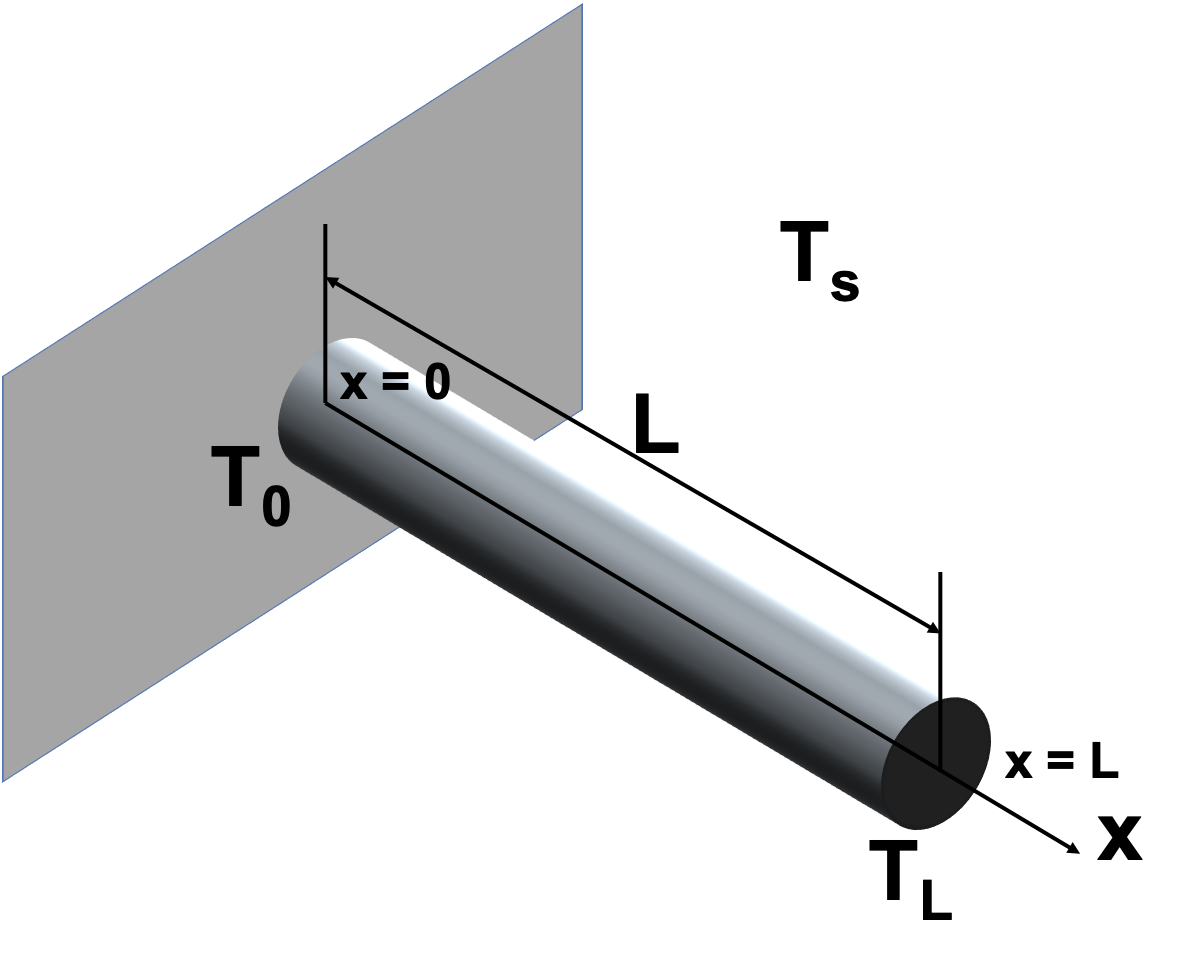

Determine the temperature distribution if $ L = 0.2 m, T (0) = 475 K, T (0.1) = 290 K, and T_s =
290 K$. 

Use the following values for the parameters: $h_c = 40 W/m^2/K, P = 0.015 m, \epsilon = 0.4,
k = 240W/m/K, and A_c = 1.55×10^{−5} m^2$

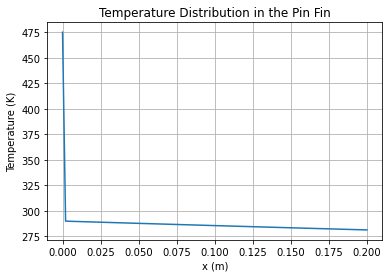

In [19]:
# Define parameters
L = 0.2  # Length of the fin
T0 = 475.0  # Temperature at x = 0
TL = 290.0  # Temperature at x = L
Ts = 290.0  # Surrounding temperature
hc = 40.0  # Convective heat transfer coefficient
P = 0.015  # Perimeter bounding the cross-section of the fin
epsilon = 0.4  # Radiative emissivity of the fin surface
k = 240.0  # Thermal conductivity of the fin material
Ac = 1.55e-5  # Cross-sectional area of the fin
sigma_SB = 5.67e-8  # Stefan-Boltzmann constant

# Calculate alpha1 and alpha2
a1 = hc * P / (k * Ac)
a2 = epsilon * sigma_SB * P / (k * Ac)

# Define the number of grid points
N = 100
dx = L / N

# Initialize arrays
x = np.linspace(0, L, N+1)
T = np.zeros(N+1)

# Set initial values
T[0] = T0
T[1] = 290.0

# Solve the finite difference equation
for i in range(1, N):
    T[i+1] = (2*a1*Ts*dx**2+2*a2*Ts**4*dx**2+2*T[i]*(1-a1*dx**2-a2*dx**2))/(2+a1*dx**2+a2*dx**2)

# Plot the temperature distribution
plt.plot(x, T)
plt.xlabel('x (m)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Distribution in the Pin Fin')
plt.grid(True)
plt.show()

10. A simply supported beam carries a uniform load of intensity $\omega_0$ as shown in the following figure.                                                                                            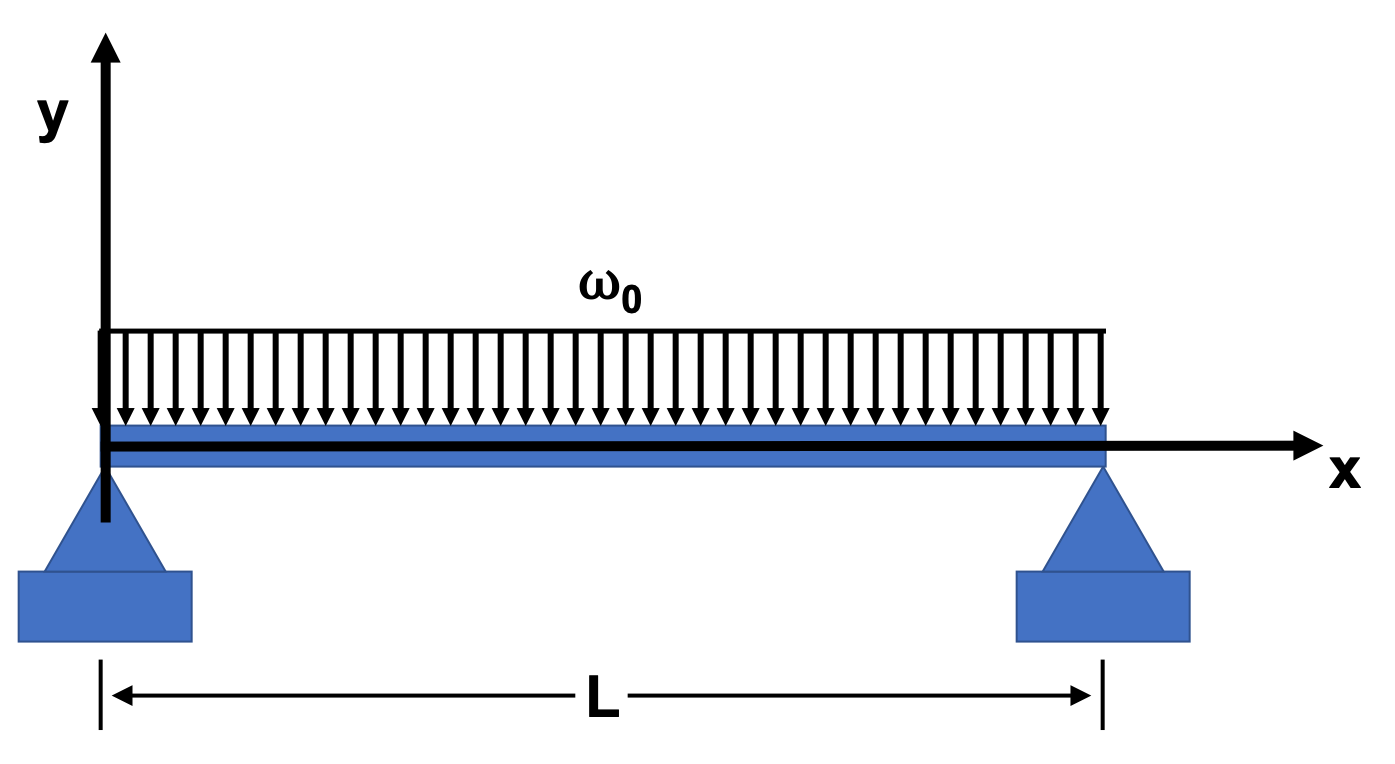
The deflection of the beam, y, is governed by the following ODE:

$$ EI \frac{d^2y}{dx^2} = \frac{1}{2} \omega_0 (Lx − x^2) \bigg[ 1+ \bigg( \frac{dy}{dx} \bigg)^2 \bigg]^{3/2} $$
where EI is the flexural rigidity.

If $L = 5 m$, and the two boundary conditions are $y(0) = 0$ and $y(L) = 0, EI = 1.8×107 N·m^2$,
and $\omega_0 = 15×103 N/m$, determine and plot the deflection of the beam as a function of $x$.

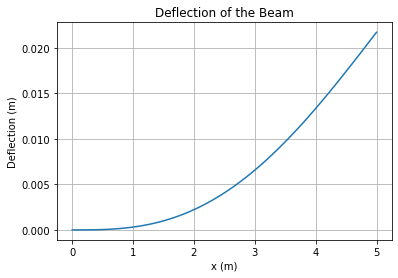

In [20]:
# Define parameters
L = 5.0  # Length of the beam
EI = 1.8e7  # Flexural rigidity
omega0 = 15e3  # Load intensity

# Define the ODE function
def ode(x, y):
    dy_dx = y[1]
    d2y_dx2 = (0.5 * omega0 * (L * x - x**2) * (1 + dy_dx**2)**(3/2)) / EI
    return [dy_dx, d2y_dx2]

# Set initial conditions
y0 = [0, 0]

# Define the range of x values
x_range = [0, L]

# Solve the ODE using solve_ivp
sol = solve_ivp(ode, x_range, y0, dense_output=True)

# Generate x values for plotting
x_vals = np.linspace(0, L, 100)

# Evaluate the solution at the desired x values
y_vals = sol.sol(x_vals)[0]

# Plot the deflection of the beam
plt.plot(x_vals, y_vals)
plt.xlabel('x (m)')
plt.ylabel('Deflection (m)')
plt.title('Deflection of the Beam')
plt.grid(True)
plt.show()